In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

%matplotlib inline 

In [3]:
data_eva = pd.read_csv("../data/observations-evanaturalist.csv")
data_eva.head()

C:\Users\lisa_\AppData\Local\Temp\ipykernel_1164\1506808894.py:1: DtypeWarning: Columns (11,24,27,28,29) have mixed types. Specify dtype option on import or set low_memory=False.
  data_eva = pd.read_csv("../data/observations-evanaturalist.csv")


,id,time_observed_at,time_zone,created_at,updated_at,quality_grade,license,url,image_url,sound_url,...,scientific_name,common_name,iconic_taxon_name,taxon_id,taxon_kingdom_name,taxon_class_name,taxon_order_name,taxon_family_name,taxon_genus_name,taxon_species_name
0,14999692,NaN,Eastern Time (US & Canada),2018-07-31 23:09:40 UTC,2018-11-22 10:29:33 UTC,research,CC-BY-NC,https://www.inaturalist.org/observations/14999692,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Ambystoma texanum,Small-mouthed Salamander,Amphibia,26745.0,Animalia,Amphibia,Caudata,Ambystomatidae,Ambystoma,Ambystoma texanum
1,15000453,NaN,Eastern Time (US & Canada),2018-07-31 23:39:47 UTC,2023-04-23 23:36:37 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15000453,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Spilosoma virginica,Virginian Tiger Moth,Insecta,60839.0,Animalia,Insecta,Lepidoptera,Erebidae,Spilosoma,Spilosoma virginica
2,15005158,NaN,Eastern Time (US & Canada),2018-08-01 02:27:54 UTC,2018-08-03 23:12:43 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15005158,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Alisma,water-plantains,Plantae,60254.0,Plantae,Liliopsida,Alismatales,Alismataceae,Alisma,NaN
3,15029656,NaN,Eastern Time (US & Canada),2018-08-01 22:37:42 UTC,2023-10-22 08:00:22 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15029656,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Sagittaria sagittifolia,Sagittifolia group,Plantae,1504193.0,Plantae,Liliopsida,Alismatales,Alismataceae,Sagittaria,NaN
4,15029889,NaN,Eastern Time (US & Canada),2018-08-01 22:46:35 UTC,2018-08-01 22:46:39 UTC,needs_id,CC-BY-NC,https://www.inaturalist.org/observations/15029889,https://inaturalist-open-data.s3.amazonaws.com...,NaN,...,Pleurotus ostreatus,Oyster Mushroom,Fungi,48494.0,Fungi,Agaricomycetes,Agaricales,Pleurotaceae,Pleurotus,Pleurotus ostreatus


In [5]:
data_eva.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90752 entries, 0 to 90751
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                90752 non-null  int64  
 1   time_observed_at                  89052 non-null  object 
 2   time_zone                         90752 non-null  object 
 3   created_at                        90752 non-null  object 
 4   updated_at                        90752 non-null  object 
 5   quality_grade                     90752 non-null  object 
 6   license                           90751 non-null  object 
 7   url                               90752 non-null  object 
 8   image_url                         90752 non-null  object 
 9   sound_url                         0 non-null      float64
 10  tag_list                          0 non-null      float64
 11  description                       625 non-null    object 
 12  num_

## Checking Positional Accuracy for Comparison to Greg's Data

In [6]:
data_eva["positional_accuracy"].describe()

count    9.004100e+04
mean     1.004048e+03
std      1.135891e+04
min      1.000000e+00
25%      2.000000e+00
50%      8.000000e+00
75%      1.010000e+02
max      1.247072e+06
Name: positional_accuracy, dtype: float64

In [7]:
# Approximately double Greg's entries with positional accuracy <= 30 m 
data_eva[data_eva['positional_accuracy'] <= 30].shape[0]

58643

The non null set of positional_accuracy has 90041 values


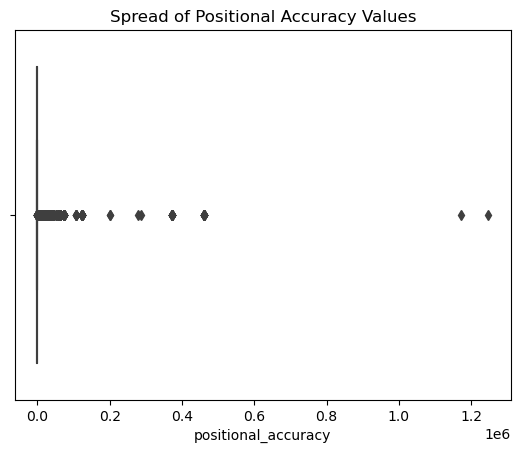

In [9]:
# boxplot of positional accuracy non null values
PA_notnull = pd.DataFrame(data_eva[data_eva["positional_accuracy"].notnull()]["positional_accuracy"])
sns.boxplot(x = "positional_accuracy", data = PA_notnull).set_title("Spread of Positional Accuracy Values")
print(f'The non null set of positional_accuracy has {PA_notnull.shape[0]} values')

The non null set of positional_accuracy with values less than 10000m has 87682 values


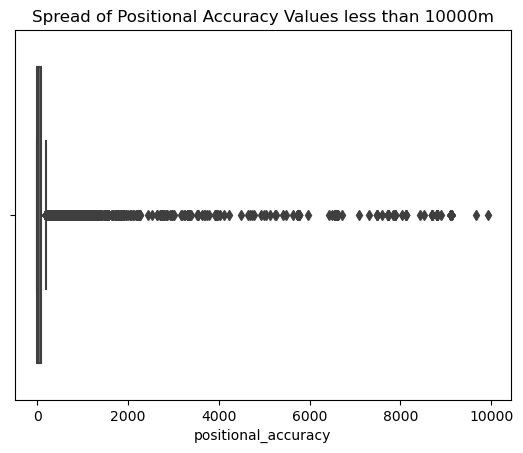

In [23]:
# again with limits
Limit = 10000
sns.boxplot(x = "positional_accuracy", data = PA_notnull[PA_notnull["positional_accuracy"] < Limit]).set_title(f'Spread of Positional Accuracy Values less than {Limit}m')
print(f'The non null set of positional_accuracy with values less than {Limit}m has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

The non null set of positional_accuracy with values less than 200m has 81693 values


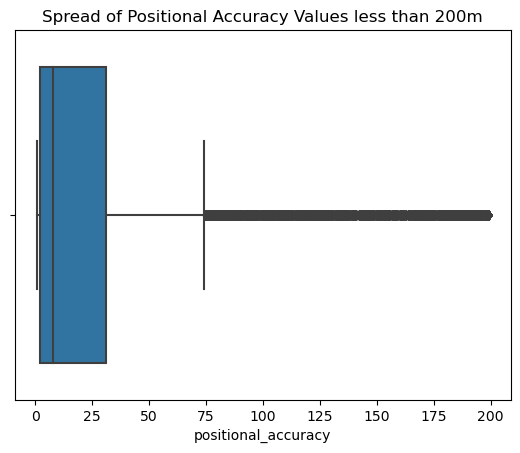

In [24]:
# again with limits
Limit = 200
sns.boxplot(x = "positional_accuracy", data = PA_notnull[PA_notnull["positional_accuracy"] < Limit]).set_title(f'Spread of Positional Accuracy Values less than {Limit}m')
print(f'The non null set of positional_accuracy with values less than {Limit}m has {PA_notnull[PA_notnull["positional_accuracy"] < Limit].shape[0]} values')

In [28]:
# number of Plantae observations with positional accuracy 30 m or less
data_eva[(data_eva["iconic_taxon_name"] == 'Plantae') & (data_eva["positional_accuracy"] <= 30)].shape[0]

34124